## 1. Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.
    Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

In [1]:
# Load Data
# The first two columns contain the exam scores and the third column contains the label.
import numpy as np
import pandas as pd
import scipy.optimize as op

headers = ['Exam1','Exam2','Label']
df = pd.read_csv('ex2data1.csv', header=None, names=headers);
df.head()

,Exam1,Exam2,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 1.1 Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. 

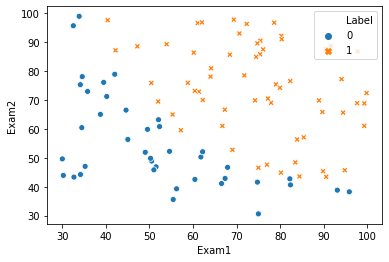

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x=df['Exam1'], y=df['Exam2'], hue=df['Label'], style=df['Label'], data=df)

### 1.2 Implementation
### Sigmoid function
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$  h_{\theta}(x) = g(\theta^Tx), $$

where function  is the sigmoid function. The sigmoid function is defined as:

$$ g(z) = \frac{1}{1+e^{-z}} $$ 

In [5]:
sigmoid = lambda z : 1 / (1 + np.exp(-z))
#Testing sigmoid function
sigmoid(0)

0.5

### Cost function and gradient
Now you will implement the cost function and gradient for logistic regression. Complete the code in costFunction.m to return the cost and gradient. Recall that the cost function in logistic regression is

$$ J(\theta) =\frac{1}{m}\sum_{i=1}^m[-y^{(i)} \log(h_{\theta}(x^{(i)}))- (1 -y^{(i)}) \log(1- h_{\theta}(x^{(i)}))], $$

and the gradient of the cost is a vector of the same length as  where the th element (for  is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m(( h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_{\theta}(x)$. 

In [6]:
#  Setup the data matrix appropriately
m,n = df.shape
df.insert(0,'Bias', np.ones(m)) #Adding the ones vector column
X = df[['Bias', 'Exam1', 'Exam2']].values
y = df['Label'].values.reshape((m,1))
theta = np.zeros(n).reshape((n,1))

In [7]:
#Cost function and gradient
def CostFunc(theta,x,y):
    theta = theta.reshape((3,1))
    h = sigmoid(x @ theta)
    return ((((-y).T @ np.log(h)) - ((1-y).T @ np.log(1-h)))/m).ravel()

def Grad(theta,x,y):
    theta = theta.reshape((3,1))
    h = sigmoid(x @ theta)
    return (x.T @ (h - y))/m

#Testing cost and gradient functions
print("Cost at initial theta (zeros): " + str(CostFunc(theta,X,y)))
print("Gradient at initial thets (zeros): " + str(Grad(theta,X,y)))

Cost at initial theta (zeros): [0.69314718]
Gradient at initial thets (zeros): [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [46]:
# Implementing gradient descent (Newton Conjugate Gradient) using the function op.minimize()
Result = op.minimize(fun = CostFunc, 
                                 x0 = theta, 
                                 args = (X, y),
                                 method = 'TNC',
                                 jac = Grad);
optimal_theta = Result.x;

In [47]:
optimal_theta

array([-25.16131854,   0.20623159,   0.20147149])

Since, we plot $x_1$ against $x_2$, the boundary line will be the equation:

$$ x_{2}=\frac{-(\theta_{0} + \theta_{1}x_{1})}{\theta_{2}}$$

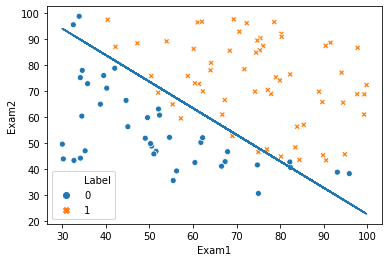

In [48]:
# Plotting the decision boundary with the scatter plot
import matplotlib.pyplot as plt
linear_func = lambda x: -(optimal_theta[0] + (optimal_theta[1] * x))/optimal_theta[2]
ax = sns.scatterplot(x=df['Exam1'], y=df['Exam2'], hue=df['Label'], style=df['Label'], data=df)
plt.plot(df['Exam1'], linear_func(df['Exam1']))

In [49]:
x_test = np.array([1, 45, 85])
prob = sigmoid(x_test @ optimal_theta)
prob

0.7762906217710582

In [50]:
# Making predictions using optimized theta
x_test = np.array([1, 45, 85])
prob = sigmoid(x_test @ optimal_theta)
print("For a student with scores 45 and 85, we predict an admission probability of " + str(prob))

For a student with scores 45 and 85, we predict an admission probability of 0.7762906217710582
